
# Exploración de Dataset


Descargar el dataset **NASA Bearings** https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset. 

Preguntas:
1) ¿Deberíamos subdividir el dataset que tenemos hasta acá en ventanas temporales y analizarlas cómo tabular? Esto nos da ventajas (dataset tabular, kfolds, reducción de dataset, etc)
2) ¿Qué threshold para matriz de correlación tomar?
    Usar df.corr(method='spearman'). Un umbral que se usa es 85%. Pero no hay que borrar la feature. La marco como posible para borrar y luego cuando evaluo el performance y veo cuales features son más importantes ahí veo si es al pedo calcularla.
3) Algunas dudas con la variable target (sólo aparece en la última row) y cómo generar el dataset (ventanas temporales que incluyen varios archivos?).
4) Autocorrelación entre las series. Coefs del correlograma?
    Usar Librosa (https://librosa.org/doc/latest/index.html)
5) Tomamos un experimento para train y otro para test? Esto no nos va a dar poca generalización?


# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import math

from cmath import sqrt
from fileinput import filename
import os
from os.path import isfile, join
from matplotlib.pyplot import axis
from numpy import divide


# Cargar datos
Cargar los datos de entrenamiento.

In [3]:
PATH_DATASET = "./dataset03.csv"

df = pd.read_csv(PATH_DATASET)

In [4]:
df.describe()

,aMean_0,std_0,irq_0,skew_0,kurtosis_0,f0_0,Pf0_0,Xrms_0,zeroX_0,p2p_0,...,covar_01,covar_02,covar_03,covar_12,covar_13,covar_23,y0,y1,y2,y3
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,...,6.324000e+03,6324.000000,6324.000000,6324.000000,6.324000e+03,6324.000000,6324.0,6324.0,6324.000000,6324.0
mean,0.058445,0.074130,0.097024,0.021647,0.431941,986.537057,51.250983,0.074168,6451.736559,0.754292,...,1.092469e-03,-0.000487,-0.000261,-0.000336,-9.828600e-04,0.000295,0.0,0.0,0.000158,0.0
std,0.005061,0.006521,0.008336,0.035819,0.179915,101.082041,1.387385,0.006517,257.274753,0.116342,...,3.684739e-04,0.001172,0.000366,0.000923,5.403042e-04,0.001056,0.0,0.0,0.012575,0.0
min,0.001533,0.001143,0.002000,-0.222896,0.021379,58.593750,17.406401,0.001912,2.000000,0.007000,...,3.875015e-07,-0.000975,-0.001036,-0.003665,-1.806103e-02,-0.000255,0.0,0.0,0.000000,0.0
25%,0.056456,0.071425,0.093000,-0.000105,0.313767,985.351562,50.282002,0.071465,6277.750000,0.681000,...,9.048685e-04,-0.000705,-0.000326,-0.000511,-9.923092e-04,0.000156,0.0,0.0,0.000000,0.0
50%,0.057657,0.073139,0.095000,0.020660,0.409228,985.351562,51.502032,0.073175,6467.000000,0.733000,...,1.045340e-03,-0.000632,-0.000288,-0.000403,-9.184678e-04,0.000182,0.0,0.0,0.000000,0.0
75%,0.059215,0.075328,0.097000,0.042575,0.518059,986.328125,52.290715,0.075365,6622.000000,0.801000,...,1.214474e-03,-0.000555,-0.000250,-0.000307,-8.620016e-04,0.000209,0.0,0.0,0.000000,0.0
max,0.122481,0.155130,0.205000,0.440111,2.064086,4390.625000,55.543065,0.155143,8025.000000,1.858000,...,7.159651e-03,0.024411,0.011741,0.032638,1.556653e-07,0.035316,0.0,0.0,1.000000,0.0


In [5]:
print(df.columns)

Index(['aMean_0', 'std_0', 'irq_0', 'skew_0', 'kurtosis_0', 'f0_0', 'Pf0_0',
       'Xrms_0', 'zeroX_0', 'p2p_0', 'crest_0', 'clearance_0', 'shape_0',
       'impulse_0', 'aMean_1', 'std_1', 'irq_1', 'skew_1', 'kurtosis_1',
       'f0_1', 'Pf0_1', 'Xrms_1', 'zeroX_1', 'p2p_1', 'crest_1', 'clearance_1',
       'shape_1', 'impulse_1', 'aMean_2', 'std_2', 'irq_2', 'skew_2',
       'kurtosis_2', 'f0_2', 'Pf0_2', 'Xrms_2', 'zeroX_2', 'p2p_2', 'crest_2',
       'clearance_2', 'shape_2', 'impulse_2', 'aMean_3', 'std_3', 'irq_3',
       'skew_3', 'kurtosis_3', 'f0_3', 'Pf0_3', 'Xrms_3', 'zeroX_3', 'p2p_3',
       'crest_3', 'clearance_3', 'shape_3', 'impulse_3', 'covar_01',
       'covar_02', 'covar_03', 'covar_12', 'covar_13', 'covar_23', 'y0', 'y1',
       'y2', 'y3'],
      dtype='object')


<AxesSubplot:ylabel='crest_0'>

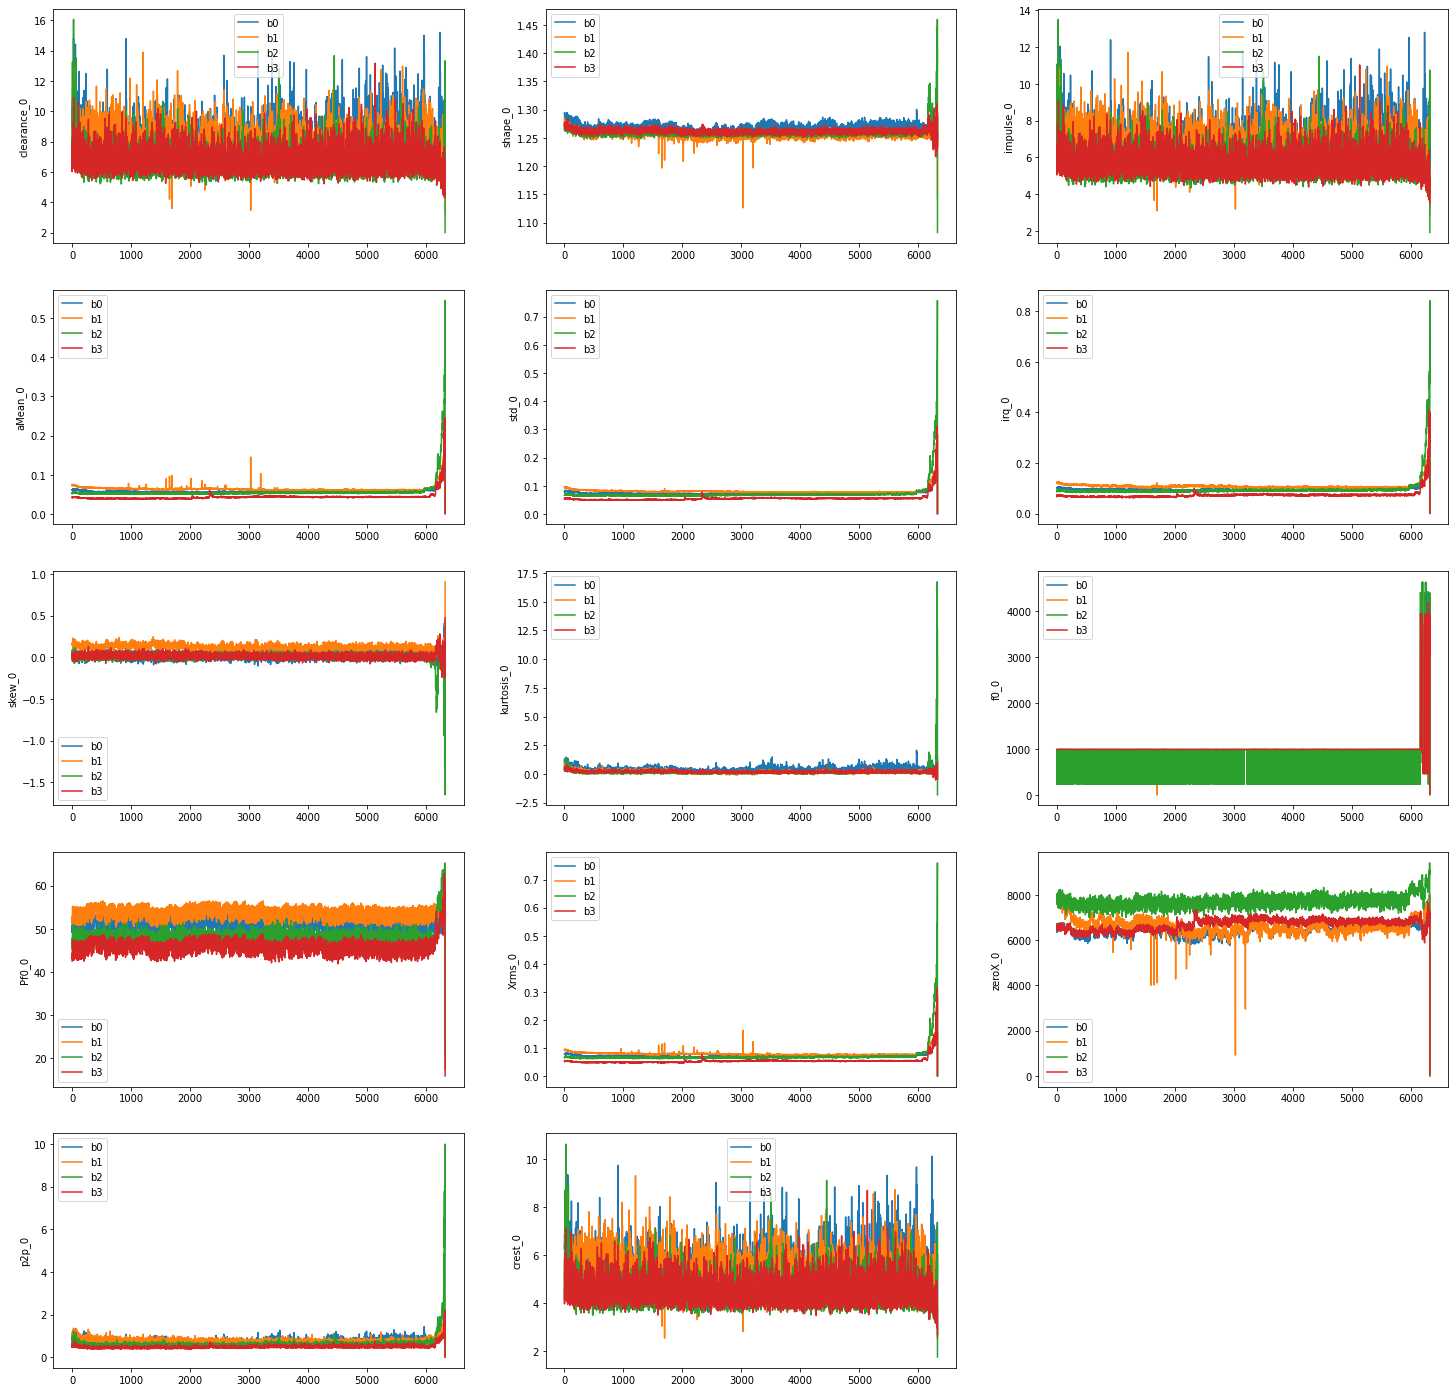

In [6]:
from matplotlib.pyplot import ylabel


plt.figure(figsize=(25,25))
plt.subplot(5,3,1)
sns.lineplot(x=df.index, y=df['clearance_0'], label='b0')
sns.lineplot(x=df.index, y=df['clearance_1'], label='b1')
sns.lineplot(x=df.index, y=df['clearance_2'], label='b2')
sns.lineplot(x=df.index, y=df['clearance_3'], label='b3')

plt.subplot(5,3,2)
sns.lineplot(x=df.index, y=df['shape_0'], label='b0')
sns.lineplot(x=df.index, y=df['shape_1'], label='b1')
sns.lineplot(x=df.index, y=df['shape_2'], label='b2')
sns.lineplot(x=df.index, y=df['shape_3'], label='b3')

plt.subplot(5,3,3)
sns.lineplot(x=df.index, y=df['impulse_0'], label='b0')
sns.lineplot(x=df.index, y=df['impulse_1'], label='b1')
sns.lineplot(x=df.index, y=df['impulse_2'], label='b2')
sns.lineplot(x=df.index, y=df['impulse_3'], label='b3')

plt.subplot(5,3,4)
sns.lineplot(x=df.index, y=df['aMean_0'], label='b0')
sns.lineplot(x=df.index, y=df['aMean_1'], label='b1')
sns.lineplot(x=df.index, y=df['aMean_2'], label='b2')
sns.lineplot(x=df.index, y=df['aMean_3'], label='b3')

plt.subplot(5,3,5)
sns.lineplot(x=df.index, y=df['std_0'], label='b0')
sns.lineplot(x=df.index, y=df['std_1'], label='b1')
sns.lineplot(x=df.index, y=df['std_2'], label='b2')
sns.lineplot(x=df.index, y=df['std_3'], label='b3')

plt.subplot(5,3,6)
sns.lineplot(x=df.index, y=df['irq_0'], label='b0')
sns.lineplot(x=df.index, y=df['irq_1'], label='b1')
sns.lineplot(x=df.index, y=df['irq_2'], label='b2')
sns.lineplot(x=df.index, y=df['irq_3'], label='b3')

plt.subplot(5,3,7)
sns.lineplot(x=df.index, y=df['skew_0'], label='b0')
sns.lineplot(x=df.index, y=df['skew_1'], label='b1')
sns.lineplot(x=df.index, y=df['skew_2'], label='b2')
sns.lineplot(x=df.index, y=df['skew_3'], label='b3')

plt.subplot(5,3,8)
sns.lineplot(x=df.index, y=df['kurtosis_0'], label='b0')
sns.lineplot(x=df.index, y=df['kurtosis_1'], label='b1')
sns.lineplot(x=df.index, y=df['kurtosis_2'], label='b2')
sns.lineplot(x=df.index, y=df['kurtosis_3'], label='b3')

plt.subplot(5,3,9)
sns.lineplot(x=df.index, y=df['f0_0'], label='b0')
sns.lineplot(x=df.index, y=df['f0_1'], label='b1')
sns.lineplot(x=df.index, y=df['f0_2'], label='b2')
sns.lineplot(x=df.index, y=df['f0_3'], label='b3')
       
plt.subplot(5,3,10)
sns.lineplot(x=df.index, y=df['Pf0_0'], label='b0')
sns.lineplot(x=df.index, y=df['Pf0_1'], label='b1')
sns.lineplot(x=df.index, y=df['Pf0_2'], label='b2')
sns.lineplot(x=df.index, y=df['Pf0_3'], label='b3')

plt.subplot(5,3,11)
sns.lineplot(x=df.index, y=df['Xrms_0'], label='b0')
sns.lineplot(x=df.index, y=df['Xrms_1'], label='b1')
sns.lineplot(x=df.index, y=df['Xrms_2'], label='b2')
sns.lineplot(x=df.index, y=df['Xrms_3'], label='b3')

plt.subplot(5,3,12)
sns.lineplot(x=df.index, y=df['zeroX_0'], label='b0')
sns.lineplot(x=df.index, y=df['zeroX_1'], label='b1')
sns.lineplot(x=df.index, y=df['zeroX_2'], label='b2')
sns.lineplot(x=df.index, y=df['zeroX_3'], label='b3')

plt.subplot(5,3,13)
sns.lineplot(x=df.index, y=df['p2p_0'], label='b0')
sns.lineplot(x=df.index, y=df['p2p_1'], label='b1')
sns.lineplot(x=df.index, y=df['p2p_2'], label='b2')
sns.lineplot(x=df.index, y=df['p2p_3'], label='b3')

plt.subplot(5,3,14)
sns.lineplot(x=df.index, y=df['crest_0'], label='b0')
sns.lineplot(x=df.index, y=df['crest_1'], label='b1')
sns.lineplot(x=df.index, y=df['crest_2'], label='b2')
sns.lineplot(x=df.index, y=df['crest_3'], label='b3')

<AxesSubplot:>

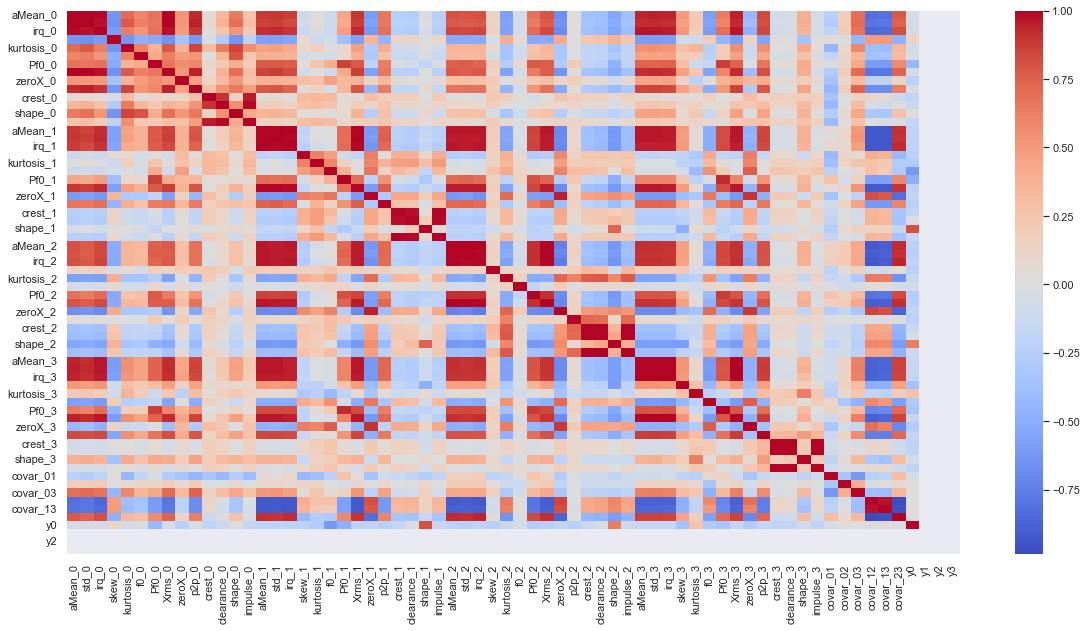

In [48]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr, fmt='.2g',cmap= 'coolwarm')

In [81]:
# delete 1 of the dimensions associated with a pearson coef close to 1
threshold = 0.99
corr_tril = np.triu(corr, k=1)   # Keep the lower triangle
indices = np.where(abs(corr_tril) >= threshold)
# dims_to_del.update(indices[1])  # Add the dimensions that correspond to a pearson coef greater than the threshold
print('Dims to delete for ' + str(threshold) + ' threshold: ')
print( list(zip(df.columns[indices[0]].tolist(), df.columns[indices[1]].tolist())))

Dims to delete for 0.99 threshold: 
[('aMean_0', 'std_0'), ('aMean_0', 'Xrms_0'), ('std_0', 'Xrms_0'), ('aMean_1', 'std_1'), ('aMean_1', 'irq_1'), ('aMean_1', 'Xrms_1'), ('std_1', 'irq_1'), ('std_1', 'Xrms_1'), ('irq_1', 'Xrms_1'), ('crest_1', 'impulse_1'), ('aMean_2', 'std_2'), ('aMean_2', 'irq_2'), ('aMean_2', 'Xrms_2'), ('std_2', 'irq_2'), ('std_2', 'Xrms_2'), ('irq_2', 'Xrms_2'), ('crest_2', 'clearance_2'), ('crest_2', 'impulse_2'), ('clearance_2', 'impulse_2'), ('aMean_3', 'std_3'), ('aMean_3', 'irq_3'), ('aMean_3', 'Xrms_3'), ('std_3', 'irq_3'), ('std_3', 'Xrms_3'), ('irq_3', 'Xrms_3'), ('crest_3', 'clearance_3'), ('crest_3', 'impulse_3'), ('clearance_3', 'impulse_3')]


In [83]:
# Drop highly correlated features
df_red = df
for i in range(4):
    df_red = df_red.drop(['aMean_'+str(i)], axis=1)
    df_red = df_red.drop(['std_'+str(i)], axis=1)
